In [1]:
import numpy as np 
import pandas as pd 

In [6]:
relation = pd.read_csv('./officer_relationship_song.csv')

kinship = pd.read_csv('./officer_kinship_song.csv')

In [7]:
relation.head(1)

,Name,姓名,Index year,Sex,Associate,社会关系人姓名,Assoc. Index Year,Assoc. Sex,Association,联系,...,亲属关系,Kin Name,亲戚姓名,Assoc. Kinship Rel.,关系人的亲属关系,Assoc. Kin Name,关系人的亲戚姓名,Distance 距离,Person ID,Assoc ID
0,An Dun,安惇,1042,M,Zou Hao,邹浩,1060.0,M,Opposed or attacked,反对/攻讦,...,未详,Wei Xiang,未详,U,未详,Wei Xiang,未详,1275.341259,1,3888


In [19]:
list_ = relation[['姓名','社会关系人姓名','联系']].groupby('联系').nunique()

In [20]:
list_['记录'] = relation[['姓名','联系']].groupby('联系').count()
list_

,姓名,社会关系人姓名,记录
联系,,,
不合,35,49,61
反对/攻讦,58,56,78
得到Y的支持,55,97,132
支持,51,49,80
政见趋同,21,23,25
遭到Y的反对/攻讦,52,111,130


In [24]:
juli = relation[['联系','Distance 距离']].groupby('联系').mean().sort_values(by = 'Distance 距离',ascending = False)
juli

,Distance 距离
联系,
支持,703.809609
得到Y的支持,699.818200
遭到Y的反对/攻讦,689.981035
反对/攻讦,664.581145
不合,566.486530
政见趋同,553.851090


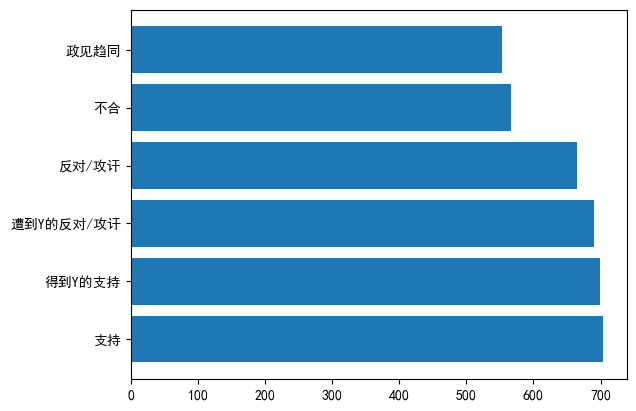

In [27]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.barh(juli.index, juli['Distance 距离'])
plt.show()

In [35]:
relation.query("联系=='支持' or 联系=='得到Y的支持' or 联系=='政见趋同'")['Distance 距离'].mean()

685.6485615160851

In [36]:
relation.query("~(联系=='支持' or 联系=='得到Y的支持' or 联系=='政见趋同')")['Distance 距离'].mean()

654.5744813763433

In [41]:
relation['指数年之差'] = abs(relation['Assoc. Index Year'] - relation['Index year'])
tu = relation[relation.notnull()].groupby('联系')[['指数年之差']].mean()

In [42]:
tu

,指数年之差
联系,
不合,10.758621
反对/攻讦,21.513889
得到Y的支持,17.614679
支持,13.373333
政见趋同,16.708333
遭到Y的反对/攻讦,20.242991


In [44]:
tu = tu.loc[['反对/攻讦','遭到Y的反对/攻讦','不合','得到Y的支持','政见趋同','支持']]
tu

,指数年之差
联系,
反对/攻讦,21.513889
遭到Y的反对/攻讦,20.242991
不合,10.758621
得到Y的支持,17.614679
政见趋同,16.708333
支持,13.373333


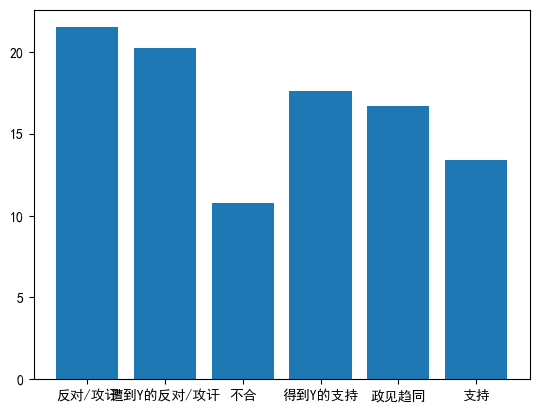

In [45]:
plt.bar(tu.index,tu['指数年之差'])
plt.show()

In [78]:
biao = relation.groupby(['姓名','联系'])['联系'].count().unstack().fillna(0)

In [52]:
relation.groupby(['姓名','联系'])['联系'].count().unstack(level = 0)

姓名,丁谓,万俟卨,令狐挻,何执中,余靖,侯蒙,冯京,刘安上,刘安世,刘氏(赵恒皇后),...,韩缜,马伸,马知节,高氏(赵曙妻),高琼,高登,高若讷,鲁宗道,黄庭坚,黄策
联系,,,,,,,,,,,,,,,,,,,,,
不合,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
反对/攻讦,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,...,1.0,NaN,1.0,1.0,NaN,1.0,1.0,NaN,NaN,1.0
得到Y的支持,1.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
支持,1.0,1.0,1.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,2.0,NaN,NaN,NaN,NaN
政见趋同,NaN,NaN,NaN,NaN,2.0,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
遭到Y的反对/攻讦,4.0,NaN,NaN,2.0,1.0,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN


In [57]:
data = {'A': ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'],
        'B': ['one', 'one', 'two', 'two', 'one', 'one'],
        'C': ['x', 'y', 'x', 'y', 'x', 'y'],
        'D': [1, 2, 3, 4, 5, 6]}

df = pd.DataFrame(data).set_index(['A', 'B', 'C'])
df.unstack(level=0)

D     
A      bar  foo
B   C          
one x  5.0  1.0
    y  6.0  2.0
two x  NaN  3.0
    y  4.0  NaN

In [58]:
kinship.columns

Index(['Name', '姓名', 'Kin Name', '亲戚姓名', 'Kinship'], dtype='object')

In [64]:
officer = set(relation['姓名'])
kin = set(kinship['亲戚姓名'])
list_ = list(officer & kin )
list_

['范仲淹',
 '曾布',
 '苏辙',
 '苏轼',
 '韩忠彦',
 '赵祯',
 '王安石',
 '章縡',
 '王安礼',
 '范纯礼',
 '韩琦',
 '章綡',
 '曾肇',
 '范纯仁',
 '赵顼']

In [91]:
df_temp = relation[relation['亲戚姓名'].isin(list_)]
df_temp

,Name,姓名,Index year,Sex,Associate,社会关系人姓名,Assoc. Index Year,Assoc. Sex,Association,联系,...,Kin Name,亲戚姓名,Assoc. Kinship Rel.,关系人的亲属关系,Assoc. Kin Name,关系人的亲戚姓名,Distance 距离,Person ID,Assoc ID,指数年之差


In [94]:
b = officer & kin
df_temp = kinship.query("亲戚姓名 in @b")

In [95]:
kinoff = df_temp.groupby('亲戚姓名')['姓名'].count()
kinoff

亲戚姓名
曾布      1
曾肇      6
王安石     1
王安礼    21
章綡      2
章縡      2
苏轼      7
苏辙      7
范仲淹    10
范纯仁     8
范纯礼    16
赵祯      1
赵顼      2
韩忠彦     5
韩琦      3
Name: 姓名, dtype: int64

In [103]:
biao['亲戚为官数'] = kinoff
biao = biao.fillna(0)
biao
biao.to_csv('./官员关系表.csv',encoding='utf_8_sig')


In [108]:
df8 = pd.read_csv('./官员关系表.csv')
df8 = df8.set_index('姓名')
df8

,不合,反对/攻讦,得到Y的支持,支持,政见趋同,遭到Y的反对/攻讦,亲戚为官数
姓名,,,,,,,
丁谓,0.0,0.0,1.0,1.0,0.0,4.0,0.0
万俟卨,0.0,0.0,0.0,1.0,0.0,0.0,0.0
令狐挻,0.0,0.0,0.0,1.0,0.0,0.0,0.0
何执中,0.0,0.0,0.0,0.0,0.0,2.0,0.0
余靖,0.0,0.0,2.0,1.0,2.0,1.0,0.0
...,...,...,...,...,...,...,...
高登,0.0,1.0,0.0,2.0,0.0,0.0,0.0
高若讷,0.0,1.0,0.0,0.0,0.0,1.0,0.0
鲁宗道,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [109]:
from sklearn.cluster import KMeans
KMeans(n_clusters = 2,random_state = 0).fit_predict(df8)

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [111]:
df8['聚类标签'] = KMeans(n_clusters = 2,random_state = 0).fit_predict(df8)
df8.head()

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,不合,反对/攻讦,得到Y的支持,支持,政见趋同,遭到Y的反对/攻讦,亲戚为官数,聚类标签
姓名,,,,,,,,
丁谓,0.0,0.0,1.0,1.0,0.0,4.0,0.0,0
万俟卨,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
令狐挻,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
何执中,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0
余靖,0.0,0.0,2.0,1.0,2.0,1.0,0.0,0


In [112]:
df8['聚类标签'].value_counts()

0    184
1      4
Name: 聚类标签, dtype: int64

In [114]:
KMeans(n_clusters = 3,random_state = 0).fit_predict(df8)

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2,
       0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])